In [1]:
from abtem import __version__
print('current version:', __version__)

import matplotlib.pyplot as plt
from ase.build import mx2

from abtem import *
from abtem.structures import orthogonalize_cell

current version: 1.0.4


ModuleNotFoundError: No module named 'abtem.structures'

In [2]:
atoms = mx2(formula='MoS2', kind='2H', a=3.18, thickness=3.19, size=(1, 1, 1), vacuum=None)

repetitions = (8, 5, 1)

atoms = orthogonalize_cell(atoms)

atoms *= repetitions

atoms.center(vacuum=2, axis=2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

show_atoms(atoms, ax=ax1, title='Top view')
show_atoms(atoms, ax=ax2, plane='xz', title='Side view')

RuntimeError: Cell vectors must have non-zero length.

In [3]:
print(f"Simulation cell: {atoms.cell}")

Simulation cell: Cell([[3.18, 0.0, 0.0], [-1.59, 2.753960784034515, 0.0], [0.0, 0.0, 0.0]])


In [4]:
potential = Potential(atoms, 
                      gpts=1024,
                      projection='finite', 
                      slice_thickness=1, 
                      parametrization='kirkland').build(pbar=True)

C:\Users\Joshu\anaconda3\envs\myenv\lib\site-packages\abtem\slicing.py:48: RuntimeWarning: invalid value encountered in double_scalars
  slice_thickness = (thickness / n,) * int(n)


TypeError: _PotentialBuilder.build() got an unexpected keyword argument 'pbar'

In [5]:
print(f"Real space sampling: {potential.sampling}")

NameError: name 'potential' is not defined

In [6]:
probe = Probe(energy=80e3, semiangle_cutoff=20, rolloff=0.1, defocus=40, Cs=3e5, focal_spread=20)

probe.grid.match(potential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
probe.profile().show(ax=ax1);
probe.ctf.show(ax=ax2);

ValueError: rolloff not a recognized parameter

In [7]:
detector = PixelatedDetector(max_angle='valid')

In [8]:
scan_end = (potential.extent[0] / repetitions[0], potential.extent[1] / repetitions[1])

gridscan = GridScan(start=[0, 0], end=scan_end, sampling=probe.ctf.nyquist_sampling * .9)

measurement = probe.scan(gridscan, detector, potential)



NameError: name 'potential' is not defined

In [9]:
print(measurement, measurement.array.shape)

NameError: name 'measurement' is not defined

NameError: name 'measurement' is not defined

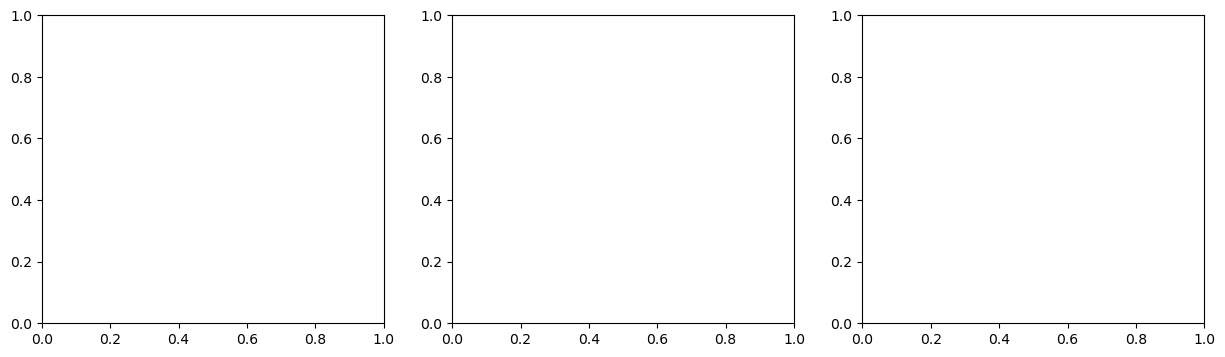

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,4))

measurement[0, 0].show(cmap='inferno', ax=ax1)
measurement[0, 3].show(cmap='inferno', ax=ax2)
measurement[1, 1].show(cmap='inferno', ax=ax3, power=.025); # displayed on power scale

for ax in (ax1, ax2, ax3):
    ax.set_xlim([-50, 50])
    ax.set_ylim([-50, 50])

In [11]:
from abtem.detect import AnnularDetector

bright_detector = AnnularDetector(inner=0, outer=20)
maadf_detector = AnnularDetector(inner=45, outer=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

bright_measurement = bright_detector.integrate(measurement)
bright_measurement.tile((3,2)).interpolate(.05).show(ax=ax1)

maadf_measurement = maadf_detector.integrate(measurement)
maadf_measurement.tile((3,2)).interpolate(.05).show(ax=ax2);

ModuleNotFoundError: No module named 'abtem.detect'

In [12]:
from abtem.measure import center_of_mass

com_x, com_y = center_of_mass(measurement)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

com_x.tile((3, 2)).interpolate(.1).show(ax=ax1, cbar=True)
com_y.tile((3, 2)).interpolate(.1).show(ax=ax2, cbar=True);

ModuleNotFoundError: No module named 'abtem.measure'

In [13]:
icom = center_of_mass(measurement, return_icom=True)

icom.interpolate(.08).tile((3,2)).show()

NameError: name 'center_of_mass' is not defined

In [14]:

pacbed = measurement.mean(axis=(0, 1))

ax, _ = pacbed.show(cmap='inferno', power=.2)

ax.set_xlim([-60, 60])
ax.set_ylim([-60, 60]);



NameError: name 'measurement' is not defined